In [1]:
import arff, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [2]:
dataset = arff.load(open('cocomo811.arff'))
data=np.array(dataset['data'])

In [3]:
data.shape

(63, 17)

In [4]:
X=data[:,0:16]
Y=data[:,16:17]

In [5]:
Y=Y.reshape(63)

In [6]:
X.shape

(63, 16)

# Cocomo n_estimator=100 and max_features= 1 to 16

In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [8]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [9]:
n_feature=7
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,11):   
    clf= RandomForestRegressor(n_estimators=100,max_features=i)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [10]:
MMRE_list

[np.float64(0.7739833137086612),
 np.float64(0.7884600680666901),
 np.float64(0.7760695206188366),
 np.float64(0.7664720336779494),
 np.float64(0.7786179796651557),
 np.float64(0.7734002117735561),
 np.float64(0.7717270668992035),
 np.float64(0.7636565796066114),
 np.float64(0.7669502350770416),
 np.float64(0.760343768142951)]

In [11]:
MdMRE_list

[np.float64(0.801829268292683),
 np.float64(0.7833333333333334),
 np.float64(0.7870731707317072),
 np.float64(0.8024390243902438),
 np.float64(0.7960975609756098),
 np.float64(0.8206097560975609),
 np.float64(0.8141463414634147),
 np.float64(0.8158461538461539),
 np.float64(0.8128048780487805),
 np.float64(0.8165)]

In [12]:
Pred_list

[0.0,
 0.0,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 0.0,
 0.0,
 0.0,
 5.263157894736842]

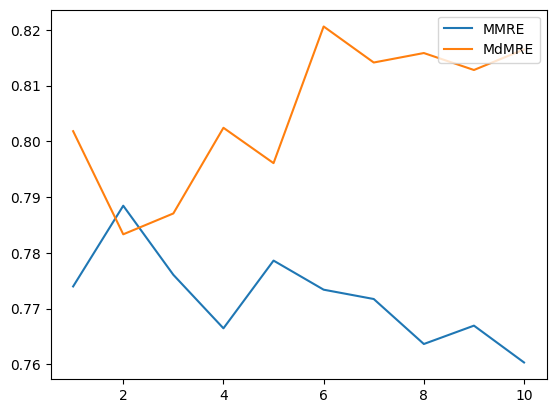

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,11)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

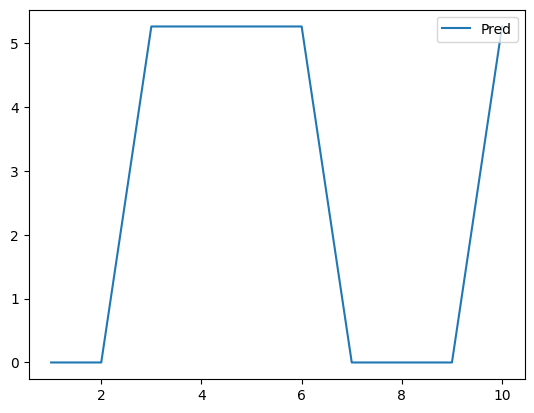

In [14]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# COCOMO n_estimator=100 to 2000 and max_features= 7


In [15]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=7)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [16]:
MMRE_list

[np.float64(0.7784905259684054),
 np.float64(0.7674720352208989),
 np.float64(0.7683578975864864),
 np.float64(0.7698373635785365),
 np.float64(0.7745679748890217),
 np.float64(0.7728908883407103),
 np.float64(0.771409038461995),
 np.float64(0.7699510128906853),
 np.float64(0.7669680610780104),
 np.float64(0.7684088500804269)]

In [17]:
MdMRE_list

[np.float64(0.8062307692307692),
 np.float64(0.8021951219512196),
 np.float64(0.8078455284552847),
 np.float64(0.8107926829268293),
 np.float64(0.8181076923076923),
 np.float64(0.8176219512195122),
 np.float64(0.809198606271777),
 np.float64(0.817530487804878),
 np.float64(0.817439024390244),
 np.float64(0.8170999999999999)]

In [18]:
Pred_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.263157894736842, 5.263157894736842, 0.0, 0.0]

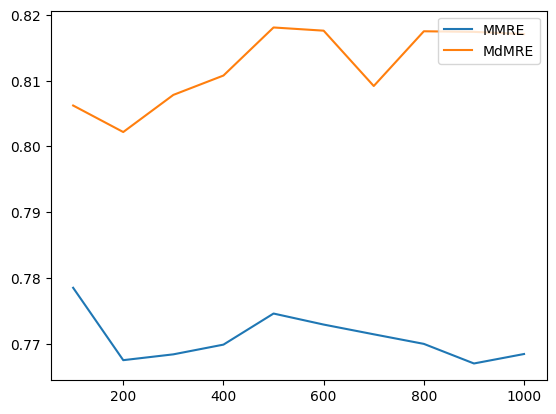

In [19]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

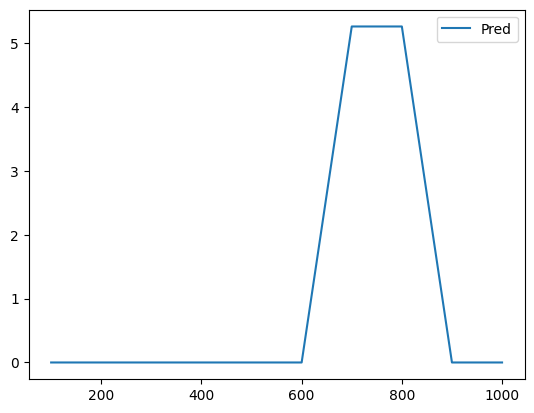

In [20]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# GridSearchCV

In [21]:
params_grd={
 'max_features': [1,2,3,4,5,6,7,8,9,10],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [22]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, training_scores_encoded)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [23]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7665297382950504
0.8067692307692307
0.0


In [24]:
grd_search.best_params_

{'max_features': 10, 'n_estimators': 400}


# Random Hyperparameter Grid

In [25]:
Random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1,2,3,4,5,6,7,8,9,10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [26]:
clf= RandomForestRegressor()
random_grd_search=RandomizedSearchCV(estimator = clf, param_distributions = Random_grid, n_iter = 80, cv = 10, 
                              verbose=2, random_state=42, n_jobs = -1)
random_grd_search.fit(X_train, training_scores_encoded)
best_grid = random_grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 80 candidates, totalling 800 fits


c:\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [27]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7566185028350015
0.8047187499999999
10.526315789473683


In [28]:
random_grd_search.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 9,
 'max_depth': 10,
 'bootstrap': False}

#  Regression Tree Analysis

In [29]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, training_scores_encoded)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

In [30]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7569677376178159
0.8394062078272605
5.263157894736842
